In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [87]:
X = pd.read_csv('data/mnist.csv')
X2 = pd.read_csv('data/data_2d.csv')

In [88]:
pca_X = PCA(n_components=2).fit_transform(X)
pca_X = pd.DataFrame(pca_X)

In [89]:
def kmeans_elbow_method(X):
    distortion = []
    r = range(1, 15)
    for i in r:
        kmean = KMeans(n_clusters=i, n_init="auto").fit(X)
        distortion.append(kmean.inertia_)
    plt.plot(r, distortion)
    plt.grid()
    plt.show()

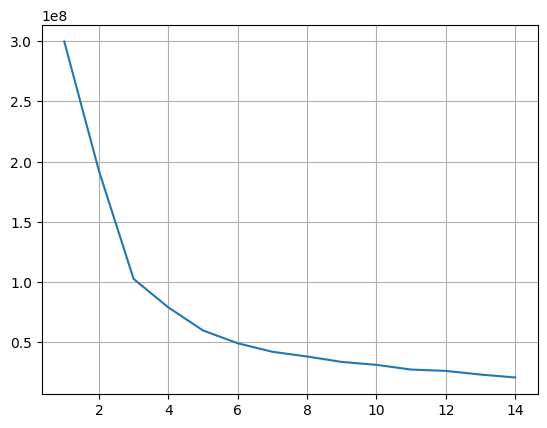

In [91]:
kmeans_elbow_method(pca_X)

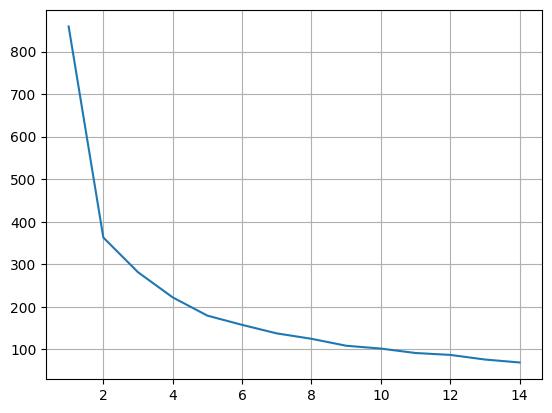

In [92]:
kmeans_elbow_method(X2)

In [93]:
model_mnist_2d = KMeans(n_clusters=3, n_init = 'auto').fit(pca_X)

model_2d = KMeans(n_clusters=2, n_init="auto").fit(X2)

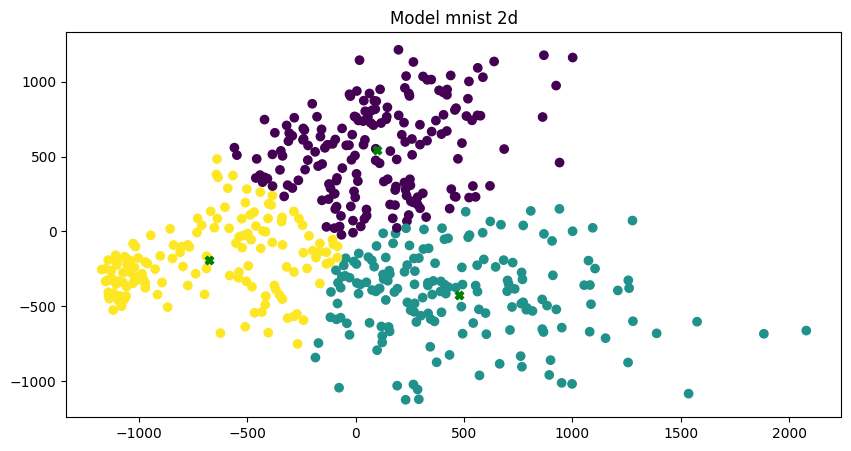

In [96]:
plt.figure(figsize=[10, 5])
plt.scatter(pca_X[0], pca_X[1], c=model_mnist_2d.labels_)
plt.scatter(model_mnist_2d.cluster_centers_[:, 0], model_mnist_2d.cluster_centers_[:, 1], c='green', marker='X')
plt.title('Model mnist 2d')
plt.show()

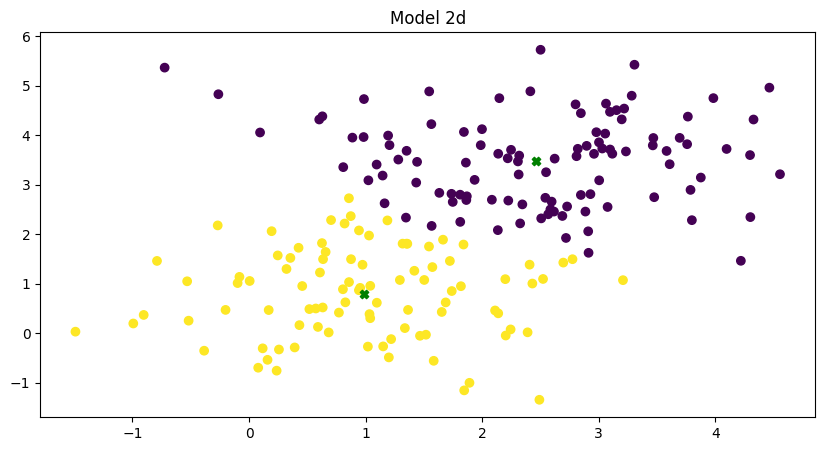

In [97]:
plt.figure(figsize=[10, 5])
plt.scatter(X2.iloc[:, 1], X2.iloc[:, 2], c=model_2d.labels_)
plt.scatter(model_2d.cluster_centers_[:, 1], model_2d.cluster_centers_[:, 2], c='green', marker='X')
plt.title('Model 2d')
plt.show()